In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
#Import the df

def turing_data(df, indexf):
    columns_to_drop = np.array([])
    for i in range(8):
        columns_to_drop = np.append(columns_to_drop,df.columns[i])
    df = df.drop(columns_to_drop, axis = 1)
    columns = {}

    for i in range(21):
        if(i>1):
            key = "Indiquez votre certitude dans le fait que c'est un humain qui a pris la décision ?\n"+"\n"+str(i)
        elif(i==0):
            key = "Indiquez votre certitude dans le fait que c'est un humain qui a pris la décision ?\n"
        else :
            key = "Indiquez votre certitude dans le fait que c'est un humain qui a pris la décision ?\n\n"

        columns[key] = i
    df.rename(columns=columns,
                    inplace=True,
                    errors='raise')

    index = sorted(indexf.items(), key=lambda t: t[1] == "robot")
    index = sorted(index, key=lambda t: t[1] == "inversed")
    columns = np.array([])
    for i in range(21) :
        columns = np.append(columns, int(index[i][0]))
    df = df.reindex(columns = columns.astype(int))
    df = df.rename(columns = indexf)
    return df


In [3]:
dataf1 = pd.read_csv("form1.csv", sep=";", encoding='latin-1')
indexf1={0 : "robot",
       1 : "human",
       2 : "robot",
       3 : "robot",
       4 : "human",
       5 : "inversed",
       6 : "human",
       7 : "human",
       8 : "robot",
       9 : "inversed",
       10 : "human",
       11 : "robot",
       12 : "robot",
       13 : "human",
       14 : "human",
       15 : "robot",
       16 : "human",
       17 : "inversed",
       18 : "robot",
       19 : "human",
       20 :"robot"}
dataf1 = turing_data(dataf1, indexf1)
dataf1

,human,human,human,human,human,human,human,human,human,robot,...,robot,robot,robot,robot,robot,robot,robot,inversed,inversed,inversed
0,0,5,2,8,8,8,2,0,6,7,...,3,2,1,2,5,3,7,0,8,3
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,0,10,0,10,4,10,10,0,0,2,...,2,3,9,10,5,9,0,0,2,0
3,7,5,0,5,0,10,10,0,10,7,...,2,3,10,10,10,10,10,0,0,0
4,10,3,0,2,2,1,6,6,0,9,...,5,8,9,2,3,5,9,7,8,0
5,9,8,1,7,7,7,4,7,5,7,...,6,6,6,9,9,6,7,6,3,3
6,7,7,8,3,3,8,3,6,6,10,...,3,3,7,8,8,4,3,4,8,3
7,6,4,5,7,4,4,5,8,4,5,...,3,6,6,7,2,8,7,6,6,5
8,2,9,2,9,6,8,5,2,4,7,...,6,7,7,7,9,7,4,2,2,2
9,0,8,0,8,0,10,9,0,7,5,...,8,3,8,7,9,7,0,0,0,0


In [4]:
dataf2 = pd.read_csv("form2.csv", sep=";", encoding='latin-1')
indexf2={0 : "human",
       1 : "robot",
       2 : "human",
       3 : "robot",
       4 : "robot",
       5 : "inversed",
       6 : "human",
       7 : "human",
       8 : "human",
       9 : "human",
       10 : "robot",
       11 : "robot",
       12 : "robot",
       13 : "inversed",
       14 : "inversed",
       15 : "human",
       16 : "robot",
       17 : "robot",
       18 : "human",
       19 : "human",
       20 : "robot"}
dataf2 = turing_data(dataf2, indexf2)
dataf2

,human,human,human,human,human,human,human,human,human,robot,...,robot,robot,robot,robot,robot,robot,robot,inversed,inversed,inversed
0,8,5,3,5,10,5,2,10,5,7,...,8,8,9,10,2,9,5,10,10,10
1,10,10,10,10,10,10,10,10,10,10,...,10,10,9,9,10,10,10,10,10,10
2,5,5,8,6,8,8,10,3,0,5,...,5,5,6,3,8,7,6,1,0,4
3,10,10,7,8,7,8,7,7,7,6,...,10,10,10,10,7,7,7,10,10,7
4,0,3,10,10,9,10,10,0,10,9,...,2,10,10,2,8,8,10,0,0,0
5,3,0,9,8,3,8,9,1,7,8,...,10,9,0,2,8,9,8,0,1,0
6,0,1,9,9,7,2,0,5,5,7,...,8,2,2,7,0,5,5,2,8,2
7,3,1,7,7,0,6,2,3,4,7,...,9,2,5,5,7,6,5,0,2,3
8,8,8,3,8,9,9,2,1,8,9,...,2,7,7,1,2,9,1,4,7,1
9,10,5,8,9,3,8,9,4,9,5,...,9,8,9,8,4,8,9,0,4,5


In [5]:
dataf3 = pd.read_csv("form3.csv", sep=";", encoding='latin-1')
indexf3={0 : "human",
       1 : "inversed",
       2 : "human",
       3 : "robot",
       4 : "robot",
       5 : "human",
       6 : "robot",
       7 : "robot",
       8 : "human",
       9 : "human",
       10 : "human",
       11 : "inversed",
       12 : "robot",
       13 : "robot",
       14 : "human",
       15 : "inversed",
       16 : "robot",
       17 : "robot",
       18 : "robot",
       19 : "human",
       20 : "human"}
dataf3 = turing_data(dataf3, indexf3)
dataf3

,human,human,human,human,human,human,human,human,human,robot,...,robot,robot,robot,robot,robot,robot,robot,inversed,inversed,inversed
0,10,10,10,0,0,10,6,0,10,10,...,0,10,0,10,0,6,10,10,10,10
1,8,7,1,9,6,5,2,8,3,6,...,6,7,8,4,8,8,7,2,2,3
2,7,8,2,7,7,7,3,8,4,8,...,7,5,6,8,7,7,6,3,4,6
3,10,5,6,8,8,5,10,8,10,9,...,9,3,7,5,10,9,10,9,3,10
4,9,5,2,7,5,6,2,6,6,1,...,3,5,4,5,7,2,6,1,3,2
5,10,7,2,8,7,2,5,8,2,10,...,6,3,3,5,9,8,8,0,2,2
6,10,9,9,1,3,7,8,5,8,2,...,9,9,3,2,2,2,2,9,9,8
7,8,5,10,3,10,2,8,5,7,8,...,7,0,10,7,5,6,8,0,4,2
8,5,8,5,8,10,9,0,1,8,10,...,3,7,10,8,7,8,9,0,2,5
9,10,10,8,10,10,10,5,6,7,10,...,5,2,7,7,10,8,10,3,0,2


In [74]:
def graph(df):
    sns.set(font_scale = 1)
    graph = sns.displot(df, kde = True, palette= "mako", multiple = "dodge", aspect=2, alpha = 0.25, legend= False)
    graph.set( title = "Distribution of the estimation of the human or artificial nature, of a human or artificial decision making", 
              xlabel = "Estimation of an artificial decision making (0) or a human decision making (10)", 
              xticks=[0,1,2,3,4,5,6,7,8,9,10], 
              ylabel = "Number of estimations")
    plt.legend(title = "Decision making",  labels=['Human inversed', 'Artificial', 'Human'], fancybox=True, framealpha=1, shadow=True, borderpad=1)
    plt.show()

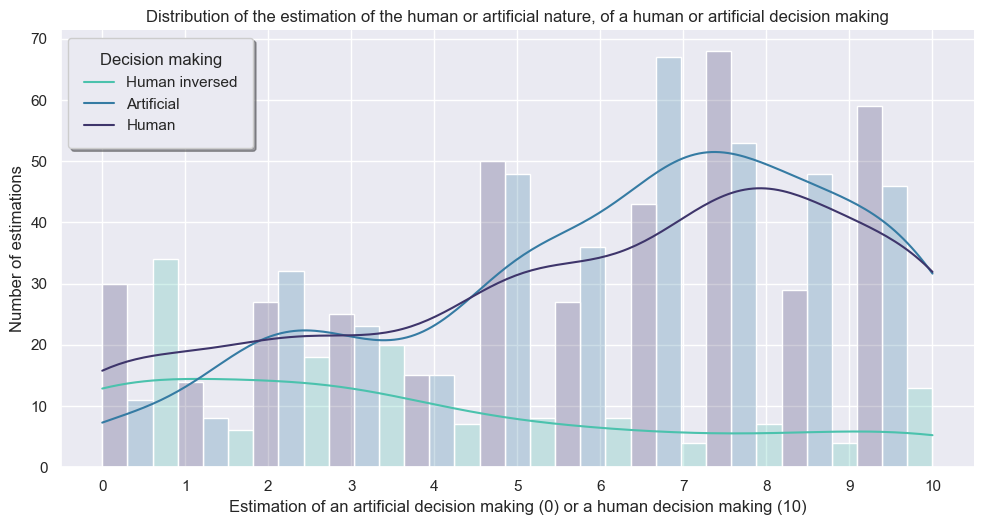

In [75]:
data = pd.concat([dataf1,dataf2,dataf3], ignore_index = True)
graph(data)